# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/54/70/e07c381e6488a77094f04c85c9caf1c8008cdc30778f7019bc52e5285ef0/gdown-5.2.0-py3-none-any.whl.metadata


C:\Users\hayoo\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: C:\Users\hayoo\Bus_Breakdown_and_Delays.csv

  0%|          | 0.00/34.4M [00:00<?, ?B/s]
  2%|1         | 524k/34.4M [00:00<00:31, 1.09MB/s]
  3%|3         | 1.05M/34.4M [00:00<00:17, 1.92MB/s]
  6%|6         | 2.10M/34.4M [00:00<00:08, 3.75MB/s]
 11%|#         | 3.67M/34.4M [00:00<00:04, 6.48MB/s]
 18%|#8        | 6.29M/34.4M [00:00<00:02, 11.1MB/s]
 32%|###1      | 11.0M/34.4M [00:01<00:01, 19.3MB/s]
 46%|####5     | 15.7M/34.4M [00:01<00:00, 26.5MB/s]
 61%|######    | 21.0M/34.4M [00:01<00:00, 33.0MB/s]
 72%|#######1  | 24.6M/34.4M [00:01<00:00, 18.6MB/s]
 85%|########5 | 29.4M/34.4M [00:01<00:00, 22.2MB/s]
100%|##########| 34.4M/34.4M [00:01<00:00, 18.6MB/s]


## Importing Libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [68]:
df=pd.read_csv("Bus_Breakdown_and_Delays.csv")
df.head() #show the first 5 rows

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [69]:
df['Breakdown_or_Running_Late'].unique() # 2 classes

array(['Running Late', 'Breakdown'], dtype=object)

In [70]:
df.shape # get the number of rows and columns

(147972, 21)

In [71]:
df.info() #get types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [72]:
df.describe() #for numerical  variables

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [73]:
df.describe(exclude='number').T # for catagorical variables

,count,unique,top,freq
School_Year,147972,4,2016-2017,83141
Run_Type,147883,10,Special Ed AM Run,85990
Bus_No,147972,10765,9354,468
Route_Number,147884,11283,1,2569
Reason,147870,10,Heavy Traffic,87426
Schools_Serviced,147972,5180,C814,1735
Occurred_On,147972,70108,01/25/2016 07:30:00 AM,39
Created_On,147972,75822,01/26/2016 07:57:00 AM,19
Boro,141654,11,Bronx,40995
Bus_Company_Name,147972,91,"G.V.C., LTD.",14198


In [74]:
df.isna().sum() #find missing values

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [75]:
df.isna().mean()*100 #the percentage of missing values

School_Year                         0.000000
Busbreakdown_ID                     0.000000
Run_Type                            0.060147
Bus_No                              0.000000
Route_Number                        0.059471
Reason                              0.068932
Schools_Serviced                    0.000000
Occurred_On                         0.000000
Created_On                          0.000000
Boro                                4.269727
Bus_Company_Name                    0.000000
How_Long_Delayed                   14.617630
Number_Of_Students_On_The_Bus       0.000000
Has_Contractor_Notified_Schools     0.000000
Has_Contractor_Notified_Parents     0.000000
Have_You_Alerted_OPT                0.000000
Informed_On                         0.000000
Incident_Number                    96.193875
Last_Updated_On                     0.000000
Breakdown_or_Running_Late           0.000000
School_Age_or_PreK                  0.000000
dtype: float64

In [76]:
df.duplicated().sum()

0

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [77]:
#Handle Missing Values

In [78]:
drop_rows=['Run_Type', 'Route_Number','Reason'] # because the percentage very low and that not effect on the analysis
df.dropna(subset=drop_rows, inplace=True)

In [79]:
drop_column=['Incident_Number'] # because the percentage of null value is very high = 96%
df = df.drop(columns=drop_column, axis=1) 

In [80]:
df['How_Long_Delayed'].value_counts() 

How_Long_Delayed
20 MINS       5650
30 MINS       4532
30 minutes    3647
15 mins       3516
30MINS        3197
              ... 
11 miinute       1
HA 9944          1
45 late          1
heavy flow       1
45 MINIUTE       1
Name: count, Length: 1862, dtype: int64

In [81]:
df['Boro'].value_counts() 

Boro
Bronx              40913
Brooklyn           35552
Manhattan          28634
Queens             21121
Staten Island       6917
Westchester         4527
Nassau County       1966
New Jersey           886
Rockland County      490
All Boroughs         275
Connecticut          102
Name: count, dtype: int64

In [82]:
#fill null values
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)

In [83]:
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

In [84]:
#Encode categorical varibales
#drop columns we don't used with models
drop_columns=['School_Year','Busbreakdown_ID','Last_Updated_On','Created_On','Has_Contractor_Notified_Schools',
              'Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Bus_No','Informed_On']
df2 = df.drop(columns=drop_columns, axis=1) 

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Run_Type                       147693 non-null  object
 1   Route_Number                   147693 non-null  object
 2   Reason                         147693 non-null  object
 3   Schools_Serviced               147693 non-null  object
 4   Occurred_On                    147693 non-null  object
 5   Boro                           147693 non-null  object
 6   Bus_Company_Name               147693 non-null  object
 7   How_Long_Delayed               147693 non-null  object
 8   Number_Of_Students_On_The_Bus  147693 non-null  int64 
 9   Breakdown_or_Running_Late      147693 non-null  object
 10  School_Age_or_PreK             147693 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.5+ MB


In [86]:
#Label Encoding:
label_encoder = LabelEncoder()

df2['Run_Type']= label_encoder.fit_transform(df2['Run_Type'])
df2['Route_Number']= label_encoder.fit_transform(df2['Route_Number'])
df2['Schools_Serviced']= label_encoder.fit_transform(df2['Schools_Serviced'])
df2['Boro']= label_encoder.fit_transform(df2['Boro'])
df2['How_Long_Delayed']= label_encoder.fit_transform(df2['How_Long_Delayed'])
df2['Breakdown_or_Running_Late']= label_encoder.fit_transform(df2['Breakdown_or_Running_Late'])
df2['School_Age_or_PreK']= label_encoder.fit_transform(df2['School_Age_or_PreK'])
df2['Bus_Company_Name']= label_encoder.fit_transform(df2['Bus_Company_Name'])
df2['Reason']= label_encoder.fit_transform(df2['Reason'])

In [87]:
# convert Occurred_On to date-time type
df2['Occurred_On'] = pd.to_datetime(df2['Occurred_On'])

In [88]:
df2['hour']=pd.to_datetime(df2['Occurred_On']).dt.hour # extract hour as new feature

C:\Users\hayoo\AppData\Local\Temp\ipykernel_34564\2318867476.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(layout=(4, 3), ax=axes)


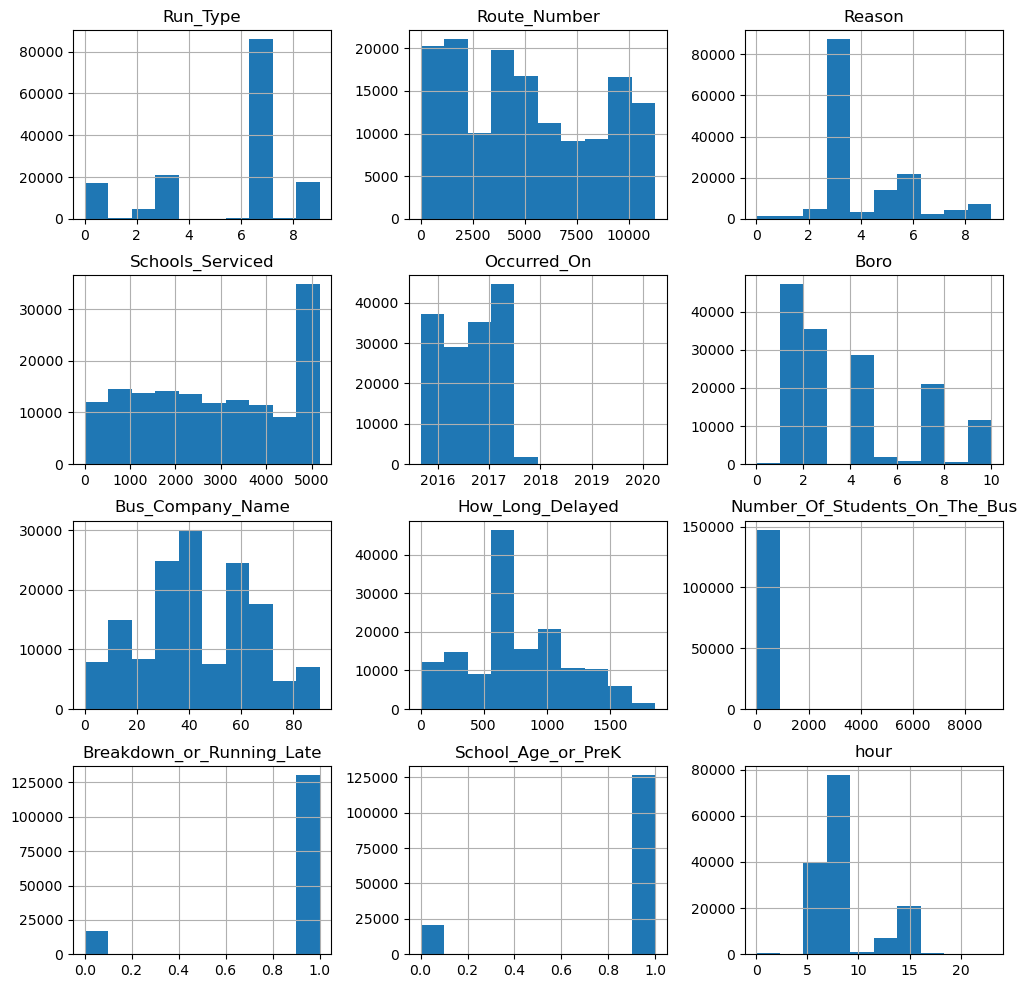

In [92]:
#show distribution
fig, axes = plt.subplots(figsize=(12, 12))
df2.hist(layout=(4, 3), ax=axes)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

In [93]:
#Correlation matrix
correlation= df2.corr()
correlation

,Run_Type,Route_Number,Reason,Schools_Serviced,Occurred_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Breakdown_or_Running_Late,School_Age_or_PreK,hour
Run_Type,1.000000,0.167424,-0.000742,-0.305806,0.006782,0.038694,0.047422,0.076469,-0.003410,-0.037583,0.395022,0.188193
Route_Number,0.167424,1.000000,-0.029295,-0.254721,0.016073,0.262719,0.117585,-0.169442,-0.013828,-0.142103,0.502765,0.044580
Reason,-0.000742,-0.029295,1.000000,0.036279,-0.051311,-0.030218,-0.025987,0.060916,-0.014777,-0.330822,0.031779,0.036748
Schools_Serviced,-0.305806,-0.254721,0.036279,1.000000,-0.049035,0.261353,-0.082898,0.007145,0.000779,0.019050,-0.543068,-0.056520
Occurred_On,0.006782,0.016073,-0.051311,-0.049035,1.000000,-0.026550,0.004699,0.031488,-0.016649,-0.010464,-0.005749,0.042948
Boro,0.038694,0.262719,-0.030218,0.261353,-0.026550,1.000000,0.162512,-0.027786,-0.007734,-0.027341,0.312946,-0.040014
Bus_Company_Name,0.047422,0.117585,-0.025987,-0.082898,0.004699,0.162512,1.000000,-0.016551,-0.005034,-0.035960,0.248623,-0.011013
How_Long_Delayed,0.076469,-0.169442,0.060916,0.007145,0.031488,-0.027786,-0.016551,1.000000,-0.009412,0.134622,0.027351,0.000917
Number_Of_Students_On_The_Bus,-0.003410,-0.013828,-0.014777,0.000779,-0.016649,-0.007734,-0.005034,-0.009412,1.000000,0.007767,-0.015379,0.000226
Breakdown_or_Running_Late,-0.037583,-0.142103,-0.330822,0.019050,-0.010464,-0.027341,-0.035960,0.134622,0.007767,1.000000,-0.118907,-0.167206


<Axes: >

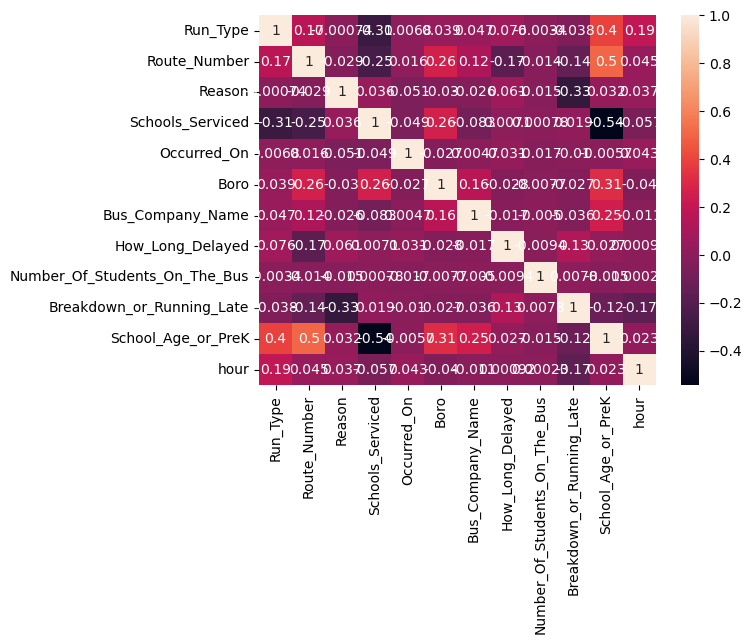

In [94]:
sns.heatmap(correlation, annot=True)

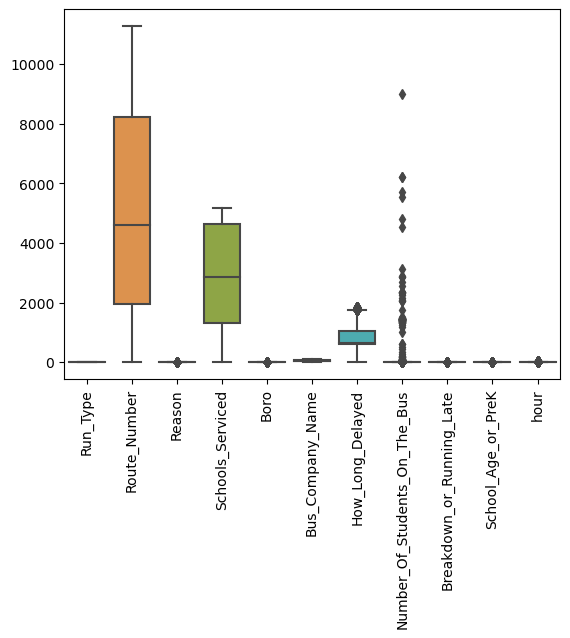

In [96]:
# show the outlier 
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

In [98]:
import numpy as np

def remove_outliers(df2, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

df2 = remove_outliers(df2, 'Number_Of_Students_On_The_Bus')


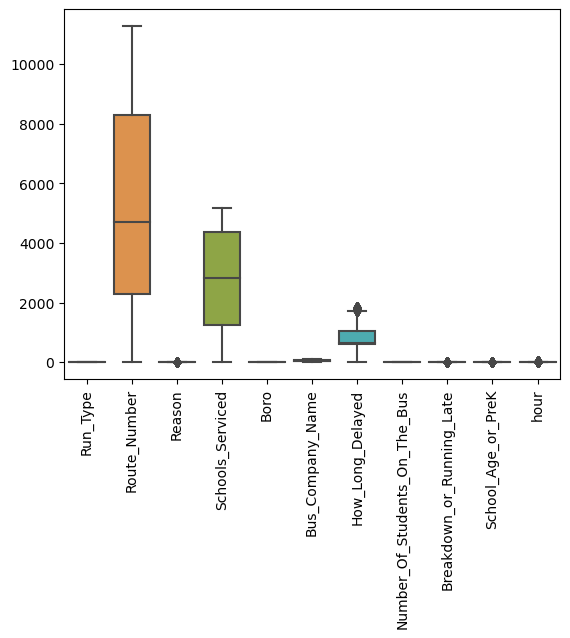

In [100]:
# show the outlier 
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

In [99]:
df.shape

(140035, 20)

In [107]:
#Scaling
scaler=MinMaxScaler()
col_drop=['Occurred_On','Breakdown_or_Running_Late' ]
df_scaled = df2.drop(columns=col_drop, axis=1) 
df_scaled

,Run_Type,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,School_Age_or_PreK,hour
0,3,77,6,4999,1,27,191,5,0,8
1,3,77,3,5067,1,27,837,3,0,7
5,7,5820,3,3549,1,0,468,3,1,7
6,3,447,3,4999,1,27,751,3,0,8
7,3,270,3,5052,1,27,187,4,0,7
...,...,...,...,...,...,...,...,...,...,...
147967,3,209,3,5037,1,27,389,7,0,8
147968,3,479,3,5052,1,27,618,0,0,7
147969,9,10874,3,1350,1,26,692,0,1,16
147970,9,7659,9,3638,7,43,618,0,1,16


In [108]:
df_scaled=pd.DataFrame(scaler.fit_transform(df_scaled),columns=df_scaled.columns)

In [ ]:
#Handle Imbalanced Data



## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [110]:
X=df_scaled
y=df2['Breakdown_or_Running_Late']

In [111]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [114]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu')) #input layer
model.add(Dense(units=6, activation='relu')) #hiddin layer
model.add(Dense(units=1, activation='sigmoid')) #output layer

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [117]:
history=model.fit(X_train, y_train, batch_size=10, epochs=20, validation_split=0.2)

Epoch 1/20
8437/8437 [==============================] - 12s 1ms/step - loss: 0.2828 - accuracy: 0.8908 - val_loss: 0.2783 - val_accuracy: 0.8953
Epoch 2/20
8437/8437 [==============================] - 12s 1ms/step - loss: 0.2826 - accuracy: 0.8909 - val_loss: 0.2794 - val_accuracy: 0.8945
Epoch 3/20
8437/8437 [==============================] - 12s 1ms/step - loss: 0.2827 - accuracy: 0.8905 - val_loss: 0.2794 - val_accuracy: 0.8949
Epoch 4/20
8437/8437 [==============================] - 13s 2ms/step - loss: 0.2826 - accuracy: 0.8906 - val_loss: 0.2782 - val_accuracy: 0.8928
Epoch 5/20
8437/8437 [==============================] - 13s 2ms/step - loss: 0.2828 - accuracy: 0.8907 - val_loss: 0.2787 - val_accuracy: 0.8940
Epoch 6/20
8437/8437 [==============================] - 13s 2ms/step - loss: 0.2827 - accuracy: 0.8904 - val_loss: 0.2782 - val_accuracy: 0.8949
Epoch 7/20
8437/8437 [==============================] - 13s 2ms/step - loss: 0.2825 - accuracy: 0.8910 - val_loss: 0.2777 - val_ac

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [118]:
model.evaluate(X_test, y_test)

824/824 [==============================] - 1s 1ms/step - loss: 0.1009 - accuracy: 0.9600


[0.10093562304973602, 0.9600227475166321]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [121]:
prediction = model.predict(X_test) # predict 
print(prediction)

824/824 [==============================] - 1s 907us/step
[[1.       ]
 [0.9700588]
 [1.       ]
 ...
 [1.       ]
 [0.7011659]
 [1.       ]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

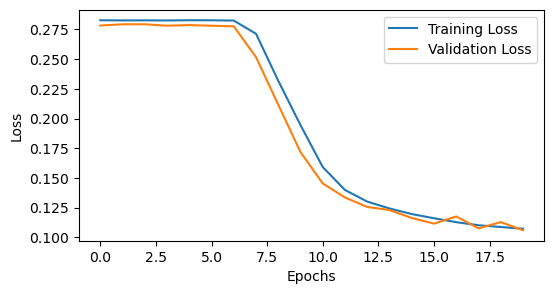

In [122]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

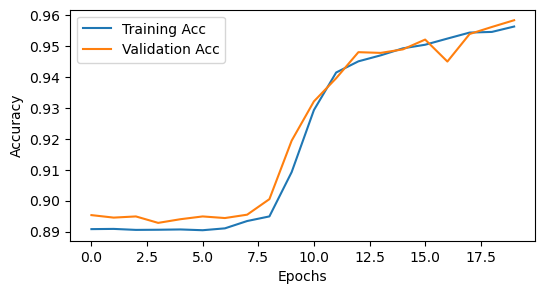

In [123]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [124]:
model.save('my_model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
- 1 Data preprocessing is important to make the feature easer understand by model. 
- 2 Model arch: I used three layers( input, hiddin, output ), activation for input and hiddin is relu, but for output layer is sigmoid because we have binary classification.
- 3 I choose,  batch_size=10, epochs=20, I think when add more epochs the model accuracy well increase.
- 4 When loss score decrease, the performance of the model increase, and reduce the errors.
- 5 when apply dropout well improve the model accuacy by remove neuorns in training.
- 6 I used model.evaulte which is return the accuracy and loss scores.
- 8 : if I faced overfitting,  I should apply dropout strategy.